In [16]:
# PYTHON GAM PRICE OPTIMIZATION
# PART 1: EXPECTILE GAM PRIMER (5 MINUTES)

# SHOWCASES THE USE OF EXPECTILE GAM (PRIMER FOR PRICE OPTIMIZATION)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import s, ExpectileGAM

# Set a global style
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

import warnings
warnings.filterwarnings('ignore')

## Data generation

In [4]:
np.random.seed(0)
n = 100
price = np.sort(np.random.exponential(scale=100, size=n))
quantity = 1000 - 5 * price + np.random.normal(loc=0, scale=50, size=n)
quantity = quantity.clip(min=0)

# Add outliers
n_outliers = 10
outlier_prices = np.random.uniform(5, 50, n_outliers)
outlier_quantity = 1100 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

# Add more outliers
n_outliers = 10
outlier_prices = np.random.uniform(51, 100, n_outliers)
outlier_quantity = 900 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

In [6]:
# Create DataFrame
df = pd.DataFrame({
    'Price': price,
    'Quantity': quantity
})

In [7]:
df

,Price,Quantity
0,0.470653,939.389241
1,1.896857,1035.557039
2,2.031245,1013.126895
3,2.042559,912.975022
4,3.997630,1054.424458
...,...,...
115,65.315229,863.098455
116,62.800610,913.996230
117,55.914403,895.092481
118,51.805052,945.508945


In [8]:
# Filter out prices less than 5
df = df[df['Price'] >= 5]

## Data modeling

In [11]:
# Reshape data
X = df[['Price']] # independent variable
y = df['Quantity'] # target variable

In [17]:
# Quantile GAMs
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam

gam_results

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

## Visualization

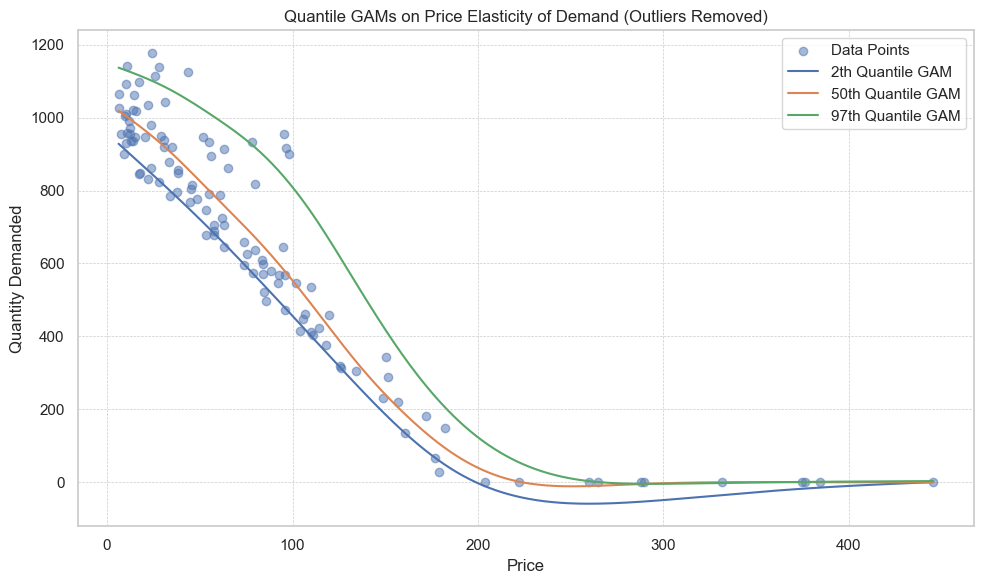

In [18]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Quantity'], alpha=0.5, label='Data Points')

# Plot Quantile GAMs
XX = np.linspace(df['Price'].min(), df['Price'].max(), 1000).reshape(-1, 1)
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Quantile GAM')

# Add title and labels
plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.title('Quantile GAMs on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()